In [10]:
### automatically refresh the buffer

%load_ext autoreload
%autoreload 2

### solve the auto-complete issue

%config Completer.use_jedi = False

### lvl 1 setups

import sys
sys.path.append('/portal1/dell/GitHub/WAYS')
sys.path.append('/portal1/dell/GitHub/sanctuary')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

### lvl 2 setups (systerm)

import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import os
import glob
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from stats import cr
from gistool import basemap, stack_image, stack_shp, stack_hatch, stack_shp_cn, ncslice
from spatial import upscale
import statsmodels.formula.api as smf
from scipy.stats.mstats import theilslopes
from scipy.stats import kendalltau
import cartopy.crs as ccrs

In [12]:
### matplotlib setups
## set the line width of the hatch
mpl.rcParams['hatch.linewidth'] = 0.5

(-300.0, 300.0)

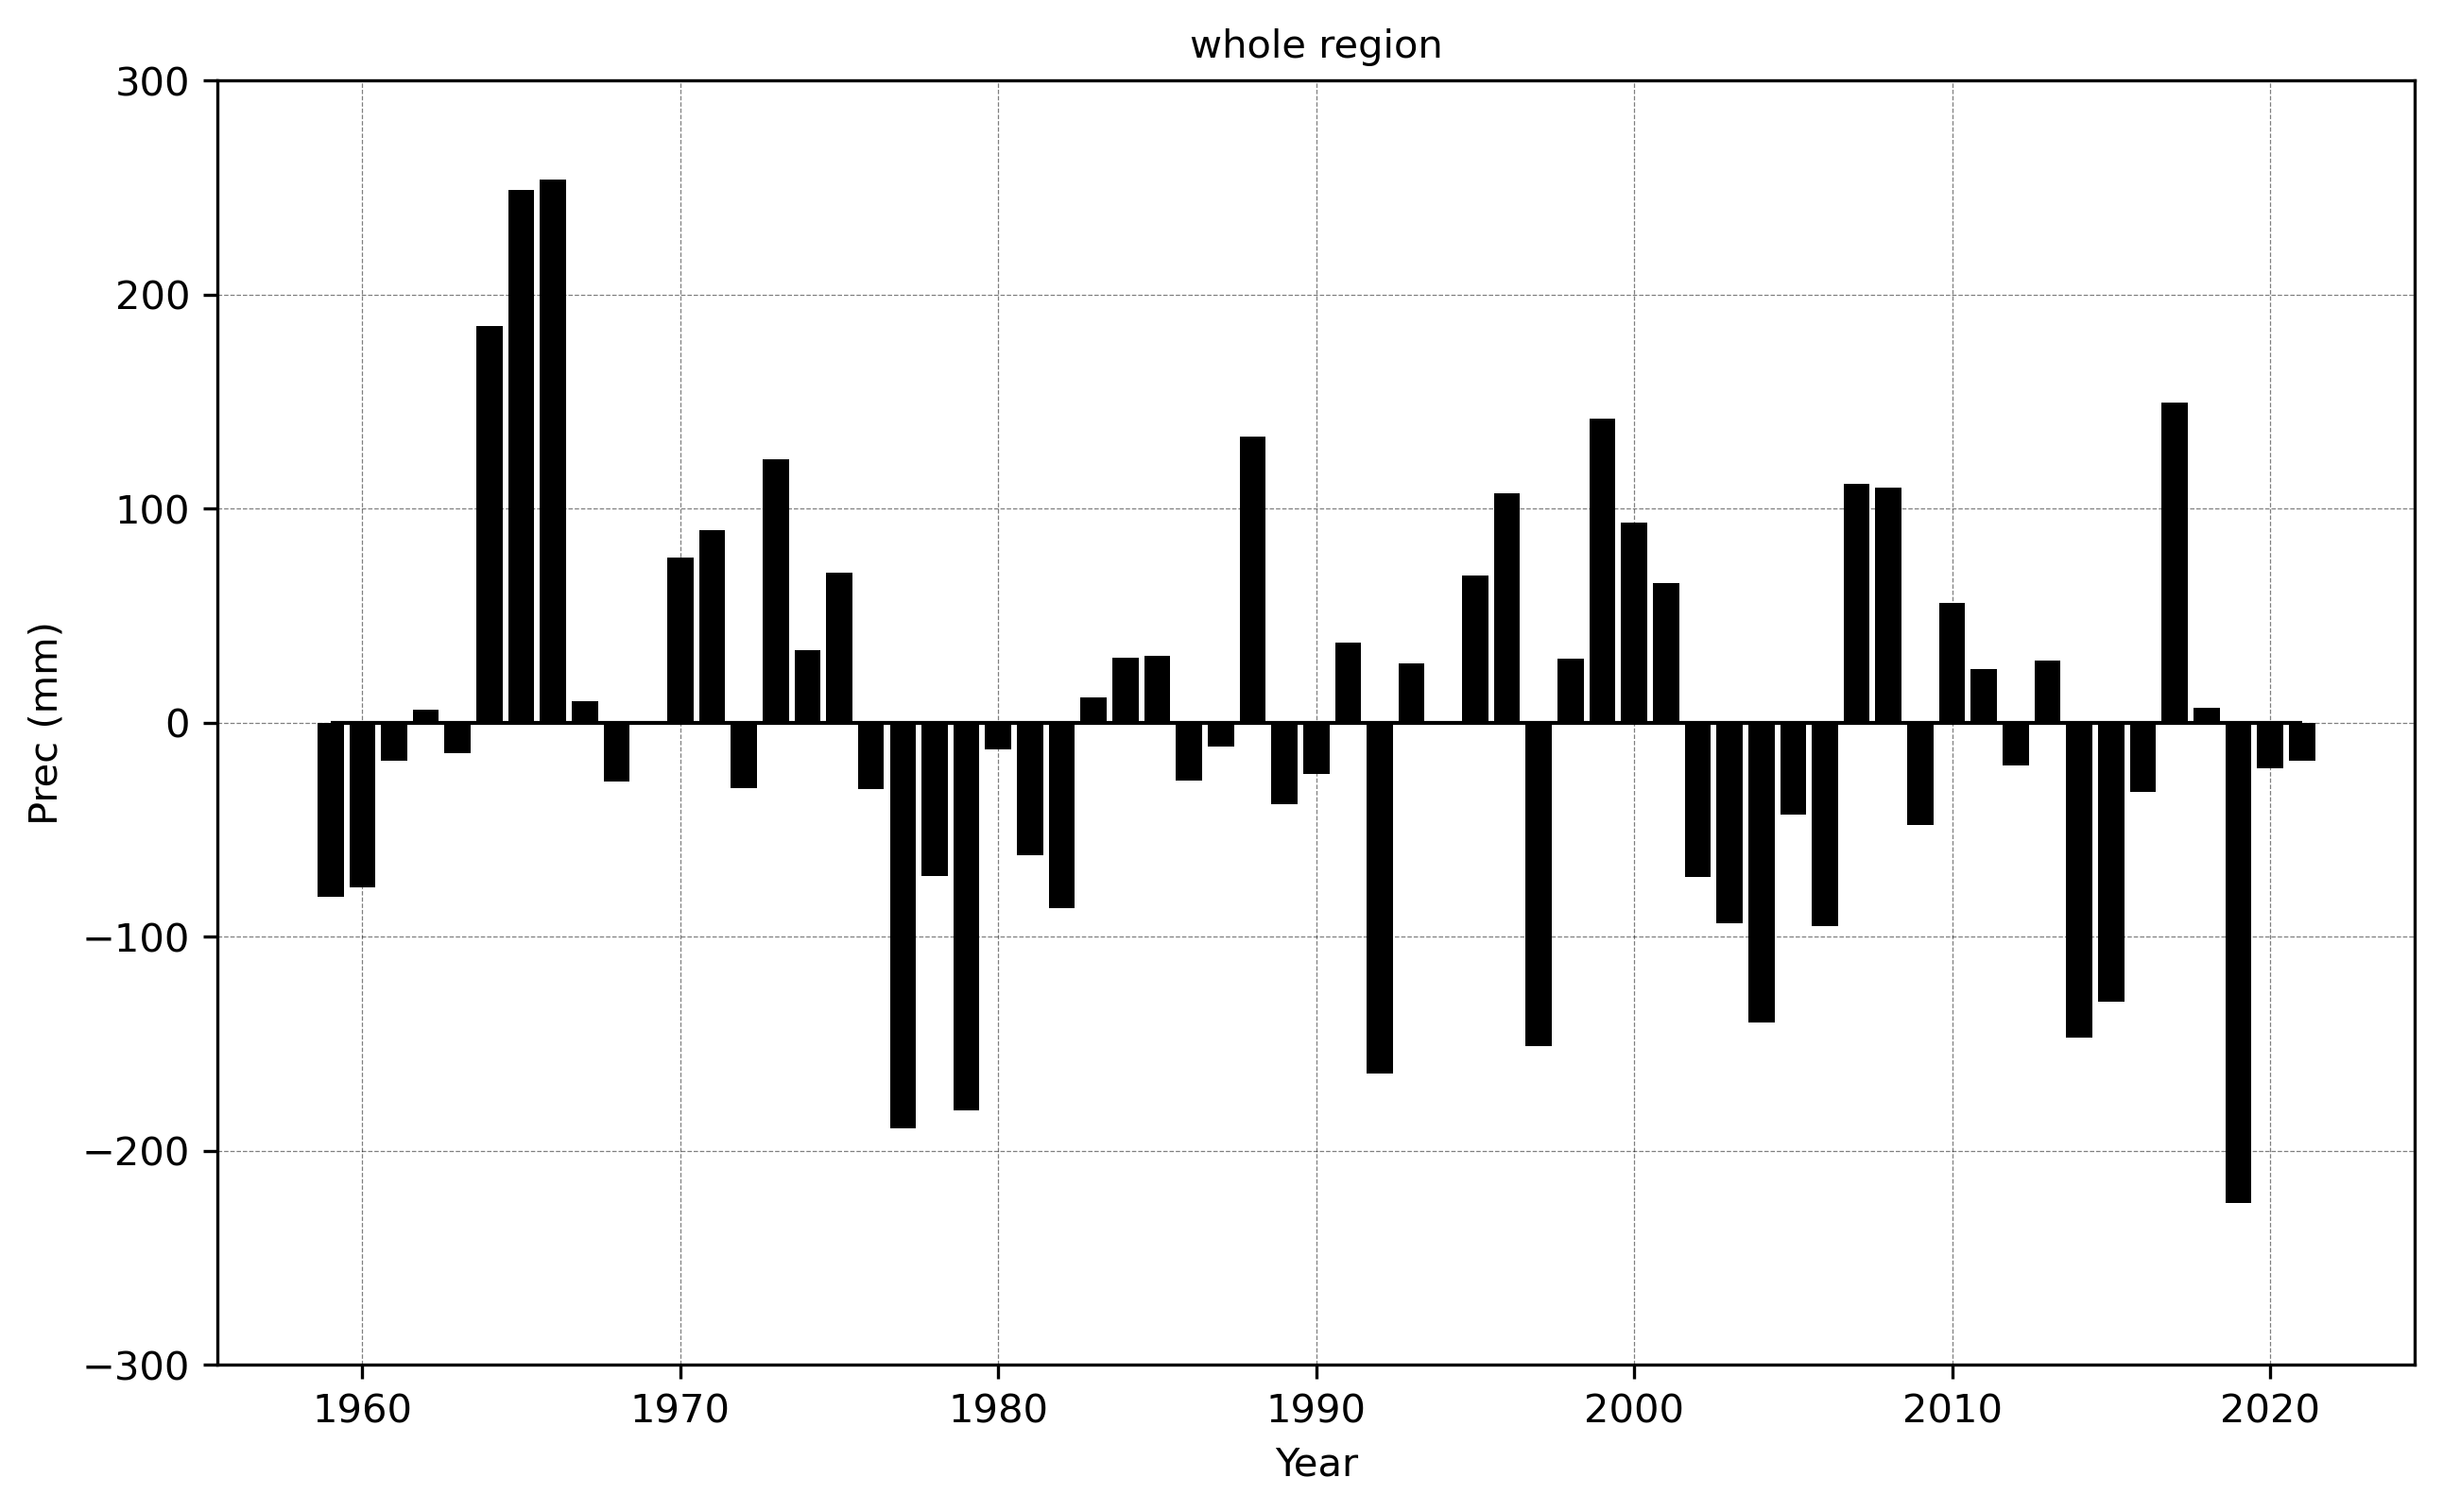

In [13]:
ds_daily=xr.open_dataset('1959_2021_prec_daily_mm.nc')
ds_8110 = ds_daily.sel(time=ds_daily.time[8036:18993])
ds_yearly = ds_daily.resample(time='Y').sum(skipna=False)
ds_8110_year = ds_8110.resample(time='Y').sum(skipna=False)

line_8110 = np.nanmean(ds_8110_year.tp.values,axis=(1,2))
line_yearly = np.nanmean(ds_yearly.tp.values,axis=(1,2))
line_ano = line_yearly-line_8110.mean()

# plot
# set time serious
time = pd.date_range(start='1958',periods=63,freq='y')
fig,ax = plt.subplots(1,1,figsize = [10,6],dpi=300)

# put time and anomaly into the figure
ax.bar(time,line_ano,color='k',width=300)

# set xlabel, ylabel and title
ax.set_ylabel('Prec (mm)', color='k', fontsize=10)
ax.set_xlabel('Year', color='k', fontsize=10)
ax.set_title("whole region", fontsize=10)

# Plot grid lines
ax.grid(linestyle='--',linewidth=0.3,alpha=0.5,color='k')

# put hlines into the figure

ax.hlines(y = 0,xmin=time[0],xmax=time[-1],color='k',linestyles='solid',lw=1)

# set ylabel limitation
ax.set_ylim(-300,300)

# put legend into the figure

# fill different color into the figure

(-400.0, 300.0)

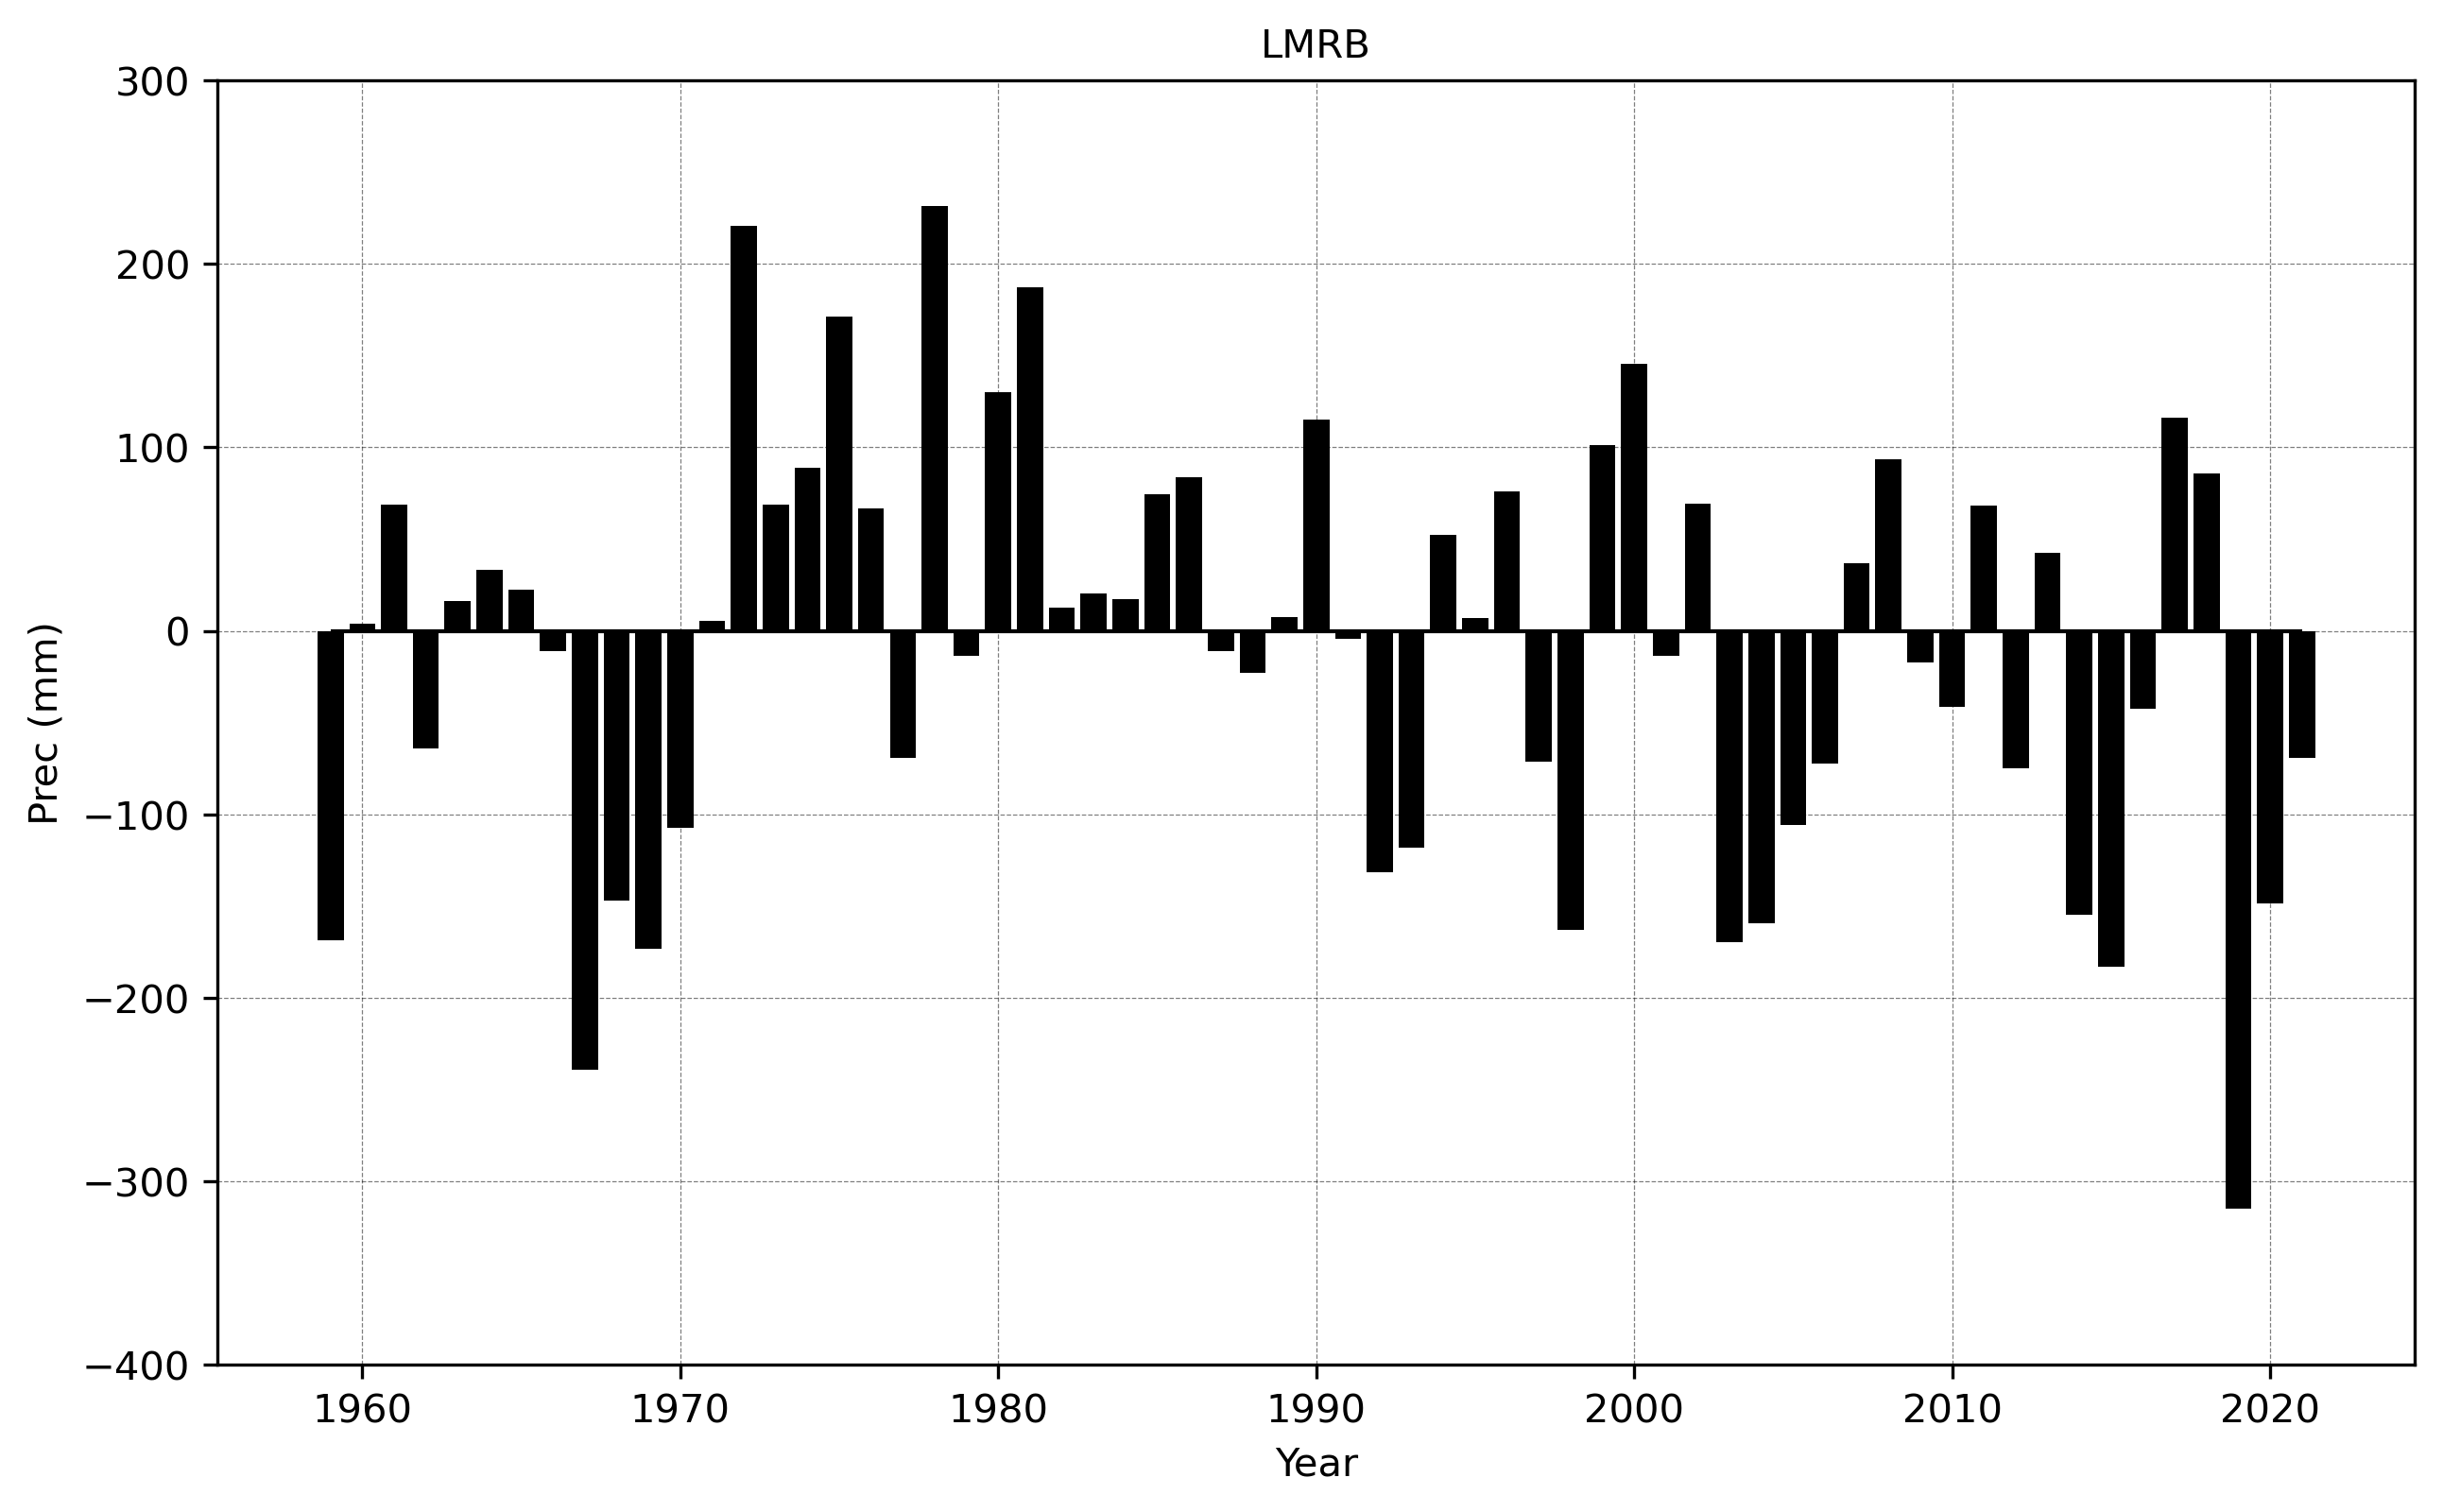

In [14]:
ds_daily=xr.open_dataset('1959_2021_prec_daily_mm.nc')
ds_8110 = xr.open_dataset('1981_2010_mean_prec_lmrb.nc')


ds_yearly = ds_daily.resample(time='Y').sum(skipna=False)
ds_8110_year = ds_8110.resample(time='Y').sum(skipna=False)

#LMRB shapefile path
file_shp = '/portal3/gis/Mekong_Delta/LANCANG_MEKONG.shp'
#slice shpfile and save as ds_bw_mk
ds_bw_mk,_ = ncslice(ds_yearly,file_shp,0, index='ID')
ds_bw_mk

line_8110 = np.nanmean(ds_8110_year.tp.values,axis=(1,2))
line_yearly = np.nanmean(ds_bw_mk.tp.values,axis=(1,2))
line_ano = line_yearly-line_8110.mean()

# plot
# set time serious
time = pd.date_range(start='1958',periods=63,freq='y')
fig,ax = plt.subplots(1,1,figsize = [10,6],dpi=300)

# put time and anomaly into the figure
ax.bar(time,line_ano,color='k',width=300)

# set xlabel, ylabel and title
ax.set_ylabel('Prec (mm)', color='k', fontsize=10)
ax.set_xlabel('Year', color='k', fontsize=10)
ax.set_title("LMRB", fontsize=10)

# Plot grid lines
ax.grid(linestyle='--',linewidth=0.3,alpha=0.5,color='k')

# put hlines into the figure

ax.hlines(y = 0,xmin=time[0],xmax=time[-1],color='k',linestyles='solid',lw=1)

# set ylabel limitation
ax.set_ylim(-400,300)

# put legend into the figure


In [15]:
ds_daily=xr.open_dataset('1959_2021_prec_daily_mm.nc')
ds_8110 = xr.open_dataset('1981_2010_mean_prec_lmrb.nc')

In [16]:
ds_remove5=ds_daily.sel(time=((ds_daily.time.dt.month == 5)))
ds_remove6=ds_daily.sel(time=((ds_daily.time.dt.month == 6)))
ds_remove7=ds_daily.sel(time=((ds_daily.time.dt.month == 7)))
ds_remove8=ds_daily.sel(time=((ds_daily.time.dt.month == 8)))
ds_remove9=ds_daily.sel(time=((ds_daily.time.dt.month == 9)))
ds_remove10=ds_daily.sel(time=((ds_daily.time.dt.month == 10)))

In [17]:
ds_remove510= xr.merge([ds_remove5,ds_remove6,ds_remove7,ds_remove8,ds_remove9,ds_remove10])


In [18]:
ds_remove81105=ds_8110.sel(time=((ds_8110.time.dt.month == 5)))
ds_remove81106=ds_8110.sel(time=((ds_8110.time.dt.month == 6)))
ds_remove81107=ds_8110.sel(time=((ds_8110.time.dt.month == 7)))
ds_remove81108=ds_8110.sel(time=((ds_8110.time.dt.month == 8)))
ds_remove81109=ds_8110.sel(time=((ds_8110.time.dt.month == 9)))
ds_remove811010=ds_8110.sel(time=((ds_8110.time.dt.month == 10)))

In [19]:
ds_8110510= xr.merge([ds_remove81105,ds_remove81106,ds_remove81107,ds_remove81108,ds_remove81109,ds_remove811010])

(-250.0, 250.0)

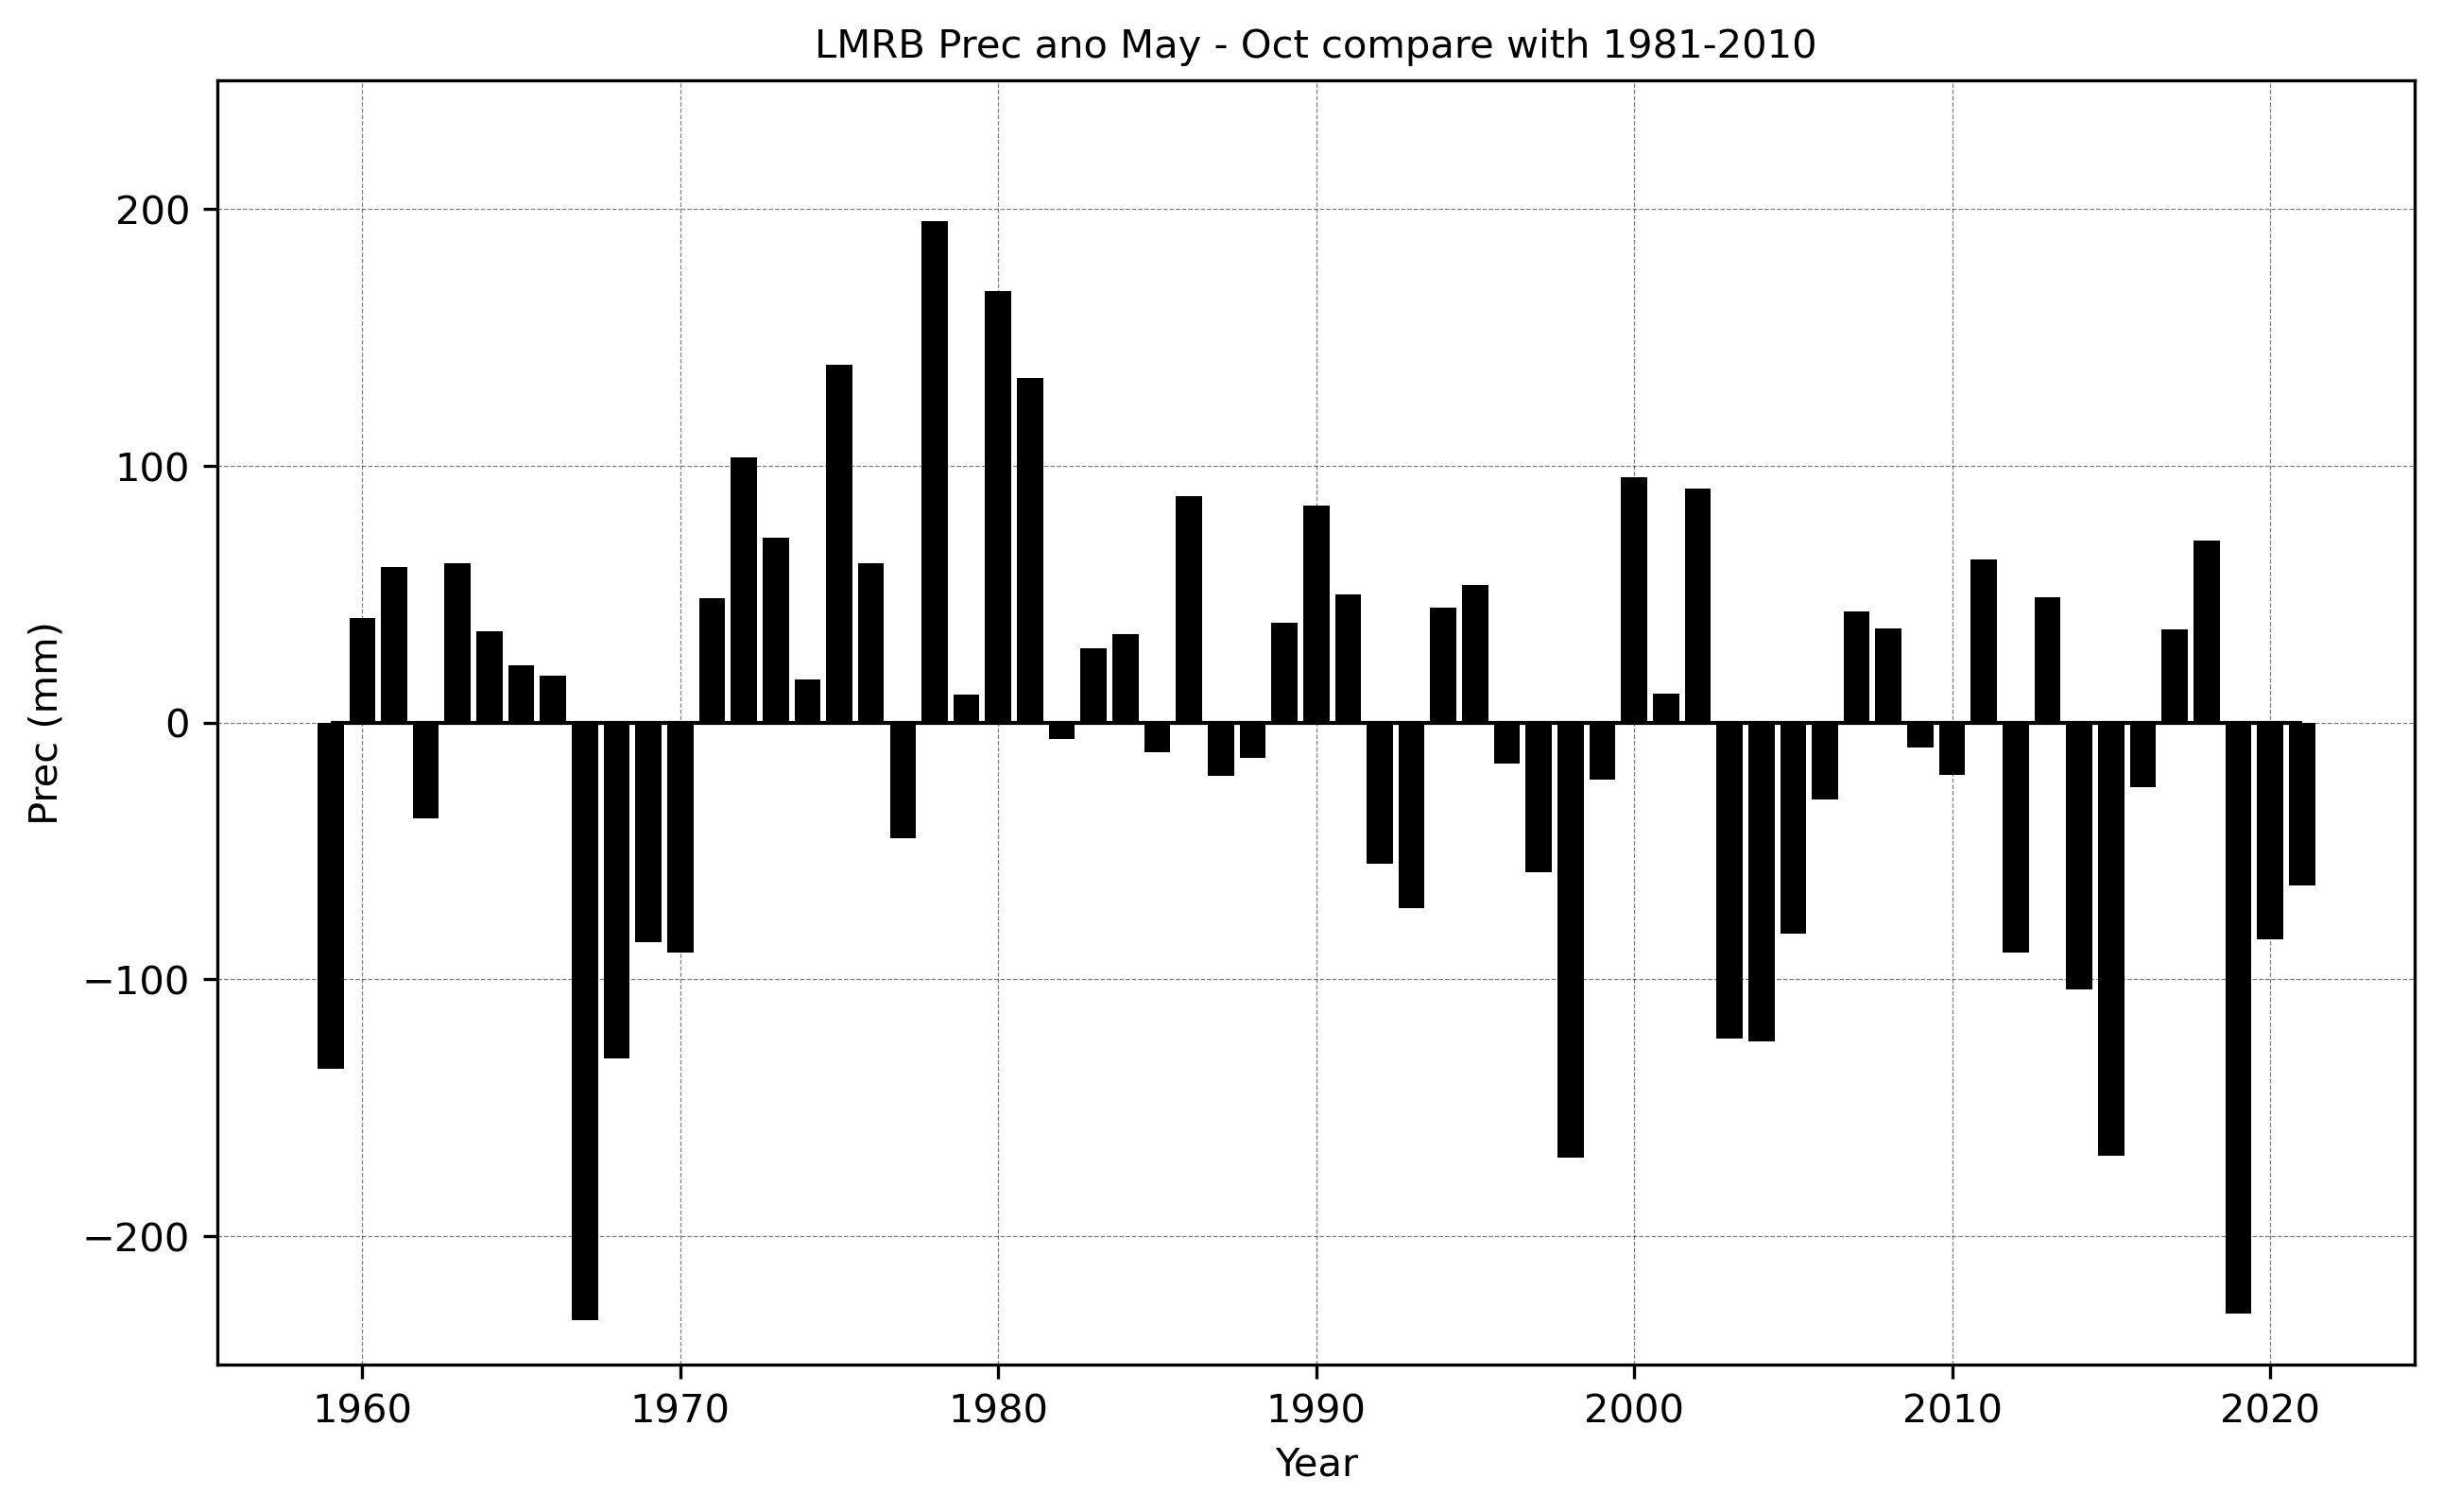

In [20]:
ds_daily = ds_remove510
ds_8110 = ds_8110510


ds_yearly = ds_daily.resample(time='Y').sum(skipna=False)
ds_8110_year = ds_8110.resample(time='Y').sum(skipna=False)

#LMRB shapefile path
file_shp = '/portal3/gis/Mekong_Delta/LANCANG_MEKONG.shp'
#slice shpfile and save as ds_bw_mk
ds_bw_mk,_ = ncslice(ds_yearly,file_shp,0, index='ID')
ds_bw_mk

line_8110 = np.nanmean(ds_8110_year.tp.values,axis=(1,2))
line_yearly = np.nanmean(ds_bw_mk.tp.values,axis=(1,2))
line_ano = line_yearly-line_8110.mean()

# plot
# set time serious
time = pd.date_range(start='1958',periods=63,freq='y')
fig,ax = plt.subplots(1,1,figsize = [10,6],dpi=300)

# put time and anomaly into the figure
ax.bar(time,line_ano,color='k',width=300)

# set xlabel, ylabel and title
ax.set_ylabel('Prec (mm)', color='k', fontsize=10)
ax.set_xlabel('Year', color='k', fontsize=10)
ax.set_title("LMRB Prec ano May - Oct compare with 1981-2010", fontsize=10)

# Plot grid lines
ax.grid(linestyle='--',linewidth=0.3,alpha=0.5,color='k')

# put hlines into the figure

ax.hlines(y = 0,xmin=time[0],xmax=time[-1],color='k',linestyles='solid',lw=1)

# set ylabel limitation
ax.set_ylim(-250,250)

# put legend into the figure